In [103]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from snaptools import snapshot
from snaptools import simulation
from snaptools import utils
from snaptools import manipulate
from matplotlib.patches import Ellipse
import pickle
from snaptools import CBcm

from mpl_toolkits.axes_grid1 import Grid

%matplotlib inline

In [113]:
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('lines', linewidth=3)

In [4]:
offsets = h5py.File('../Data/offSets_MW.hdf5')['main']


In [5]:
disk_dist = np.sqrt(np.sum((offsets['disk_pos'][()] -
                    offsets['dynamical_center'][:, 0:2])**2, axis=1))

bar_dist = np.sqrt(np.sum((offsets['bar_pos'][()] -
                    offsets['dynamical_center'][:, 0:2])**2, axis=1))

bar_offset = np.sqrt(np.sum((offsets['bar_pos'][()] -
                             offsets['disk_pos'][()])**2, axis=1))

times = offsets['time']

In [125]:
DehnenOffsets_new = h5py.File('../Data/offSetsDehnen_new.hdf5', 'r')
DehnenOffsets_continue = h5py.File('../Data/offSetsDehnen_continue.hdf5', 'r')

group = '/stars/45deg'
time_iso = DehnenOffsets_new['%s/main'%group]['time'][()]
diskdyn_dist = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['disk_pos'][:, :, 0] -
                    DehnenOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))

bardyn_dist = np.sqrt(np.sum((DehnenOffsets_new['%s/main'%group]['bar_pos'][()] -
                    DehnenOffsets_new['%s/main'%group]['dynamical_center'][:, 0:2])**2, axis=1))

diskdyn_dist_cont = np.sqrt(np.sum((DehnenOffsets_continue['%s/continue'%group]['disk_pos'][:, :, 0] -
                    DehnenOffsets_continue['%s/continue'%group]['dynamical_center'][:, 0:2])**2, axis=1))

times_cont = DehnenOffsets_continue['%s/continue'%group]['time'][()]+time_iso[-1]

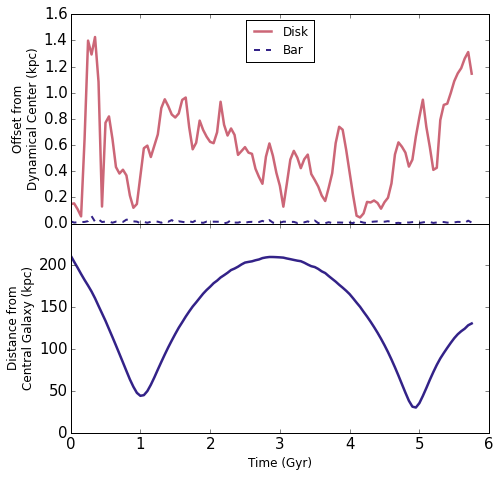

In [118]:
fig = plt.figure(figsize=(7.5, 7.5))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
grid = Grid(fig, 111,
            nrows_ncols=(2, 1),
            axes_pad=0.0,
            label_mode="L",
            share_all=False
            )

axis = grid[0]
axis.plot(times, disk_dist, color=colors[1], label='Disk', linewidth=2.5)
axis.plot(times, bar_dist, color=colors[0], label='Bar', linestyle='--', linewidth=2)

axis.set_ylabel('Offset from \nDynamical Center (kpc)', fontsize=12)

axis.legend(loc='upper center', fontsize=12)

axis = grid[1]
axis.plot(time, np.sqrt(np.sum((lmc_pos-mw_pos)**2, axis=1)), linewidth=2.5)
axis.set_xlabel('Time (Gyr)', fontsize=12)
axis.set_ylabel('Distance from \nCentral Galaxy (kpc)', fontsize=12)

yticks = axis.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)
plt.savefig('/usr/users/spardy/Dropbox/research_notes/Jun13/offsets_MW.pdf', dpi=600)

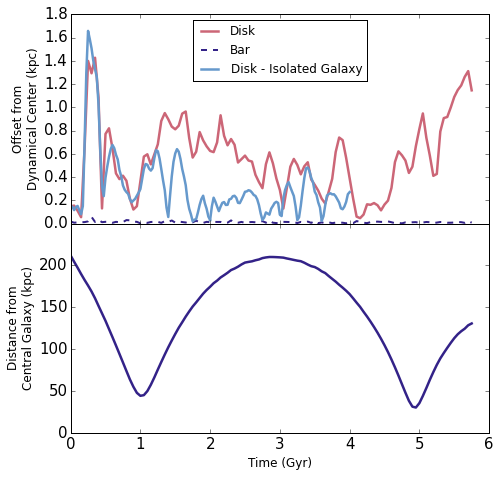

In [129]:
fig = plt.figure(figsize=(7.5, 7.5))
colors = ['#332288', '#CC6677', '#6699CC', '#117733']
grid = Grid(fig, 111,
            nrows_ncols=(2, 1),
            axes_pad=0.0,
            label_mode="L",
            share_all=False
            )

axis = grid[0]
axis.plot(times, disk_dist, color=colors[1], label='Disk', linewidth=2.5)
axis.plot(times, bar_dist, color=colors[0], label='Bar', linestyle='--', linewidth=2)

axis.plot(time_iso, diskdyn_dist, color=colors[2], label='Disk - Isolated Galaxy', linewidth=2.5)
axis.plot(times_cont, diskdyn_dist_cont, color=colors[2], linewidth=2.5)

axis.set_ylabel('Offset from \nDynamical Center (kpc)', fontsize=12)

axis.legend(loc='upper center', fontsize=12)

axis = grid[1]
axis.plot(time, np.sqrt(np.sum((lmc_pos-mw_pos)**2, axis=1)), linewidth=2.5)
axis.set_xlabel('Time (Gyr)', fontsize=12)
axis.set_ylabel('Distance from \nCentral Galaxy (kpc)', fontsize=12)

yticks = axis.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)

In [11]:
def find_pos(snapname):
    snap = snapshot.Snapshot(snapname)

    mass = snap.masses['stars']
    mw = np.where(mass == 4.80004064e-06)[0]
    lmc = np.where(mass == 3.60104877e-07)[0]
    smc = np.where(mass == 3.6749981e-07)[0]

    
    return (snap.pos['stars'][mw, :].mean(axis=0),
            snap.pos['stars'][lmc, :].mean(axis=0),
            snap.pos['stars'][smc, :].mean(axis=0),
            snap.header['time'])


folder = '/usr/users/spardy/coors2/working/offsets_MW/output_MW/'

sim = simulation.Simulation(folder)
positions = sim.apply_function(find_pos)



In [61]:
lmc_pos = np.empty((len(positions), 3))
smc_pos = np.empty((len(positions), 3))
mw_pos = np.empty((len(positions), 3))
time = np.empty(len(positions))

for i, p in enumerate(positions):
    mw_pos[i, :] = p[0]
    lmc_pos[i, :] = p[1]
    smc_pos[i, :] = p[2]
    time[i] = p[3]

In [102]:
pickle.dump({'lmc': lmc_pos, 'smc': smc_pos, 'mw': mw_pos}, open(folder+'positions.pkl', 'wb'))

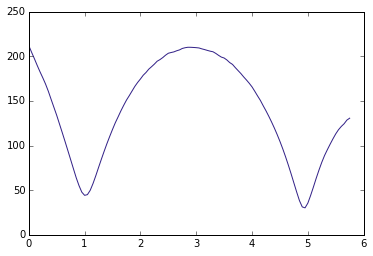

In [62]:
plt.plot(time, np.sqrt(np.sum((lmc_pos-mw_pos)**2, axis=1)))
#plt.plot(time, np.sqrt(np.sum((smc-mw)**2, axis=1)))
#plt.plot(time, np.sqrt(np.sum((smc-lmc)**2, axis=1)))

In [36]:
snap = snapshot.Snapshot(folder+'snap_095.hdf5')

In [37]:
mass = snap.masses['stars']
mw = np.where(mass == 4.80004064e-06)[0]
lmc = np.where(mass == 3.60104877e-07)[0]
smc = np.where(mass == 3.6749981e-07)[0]

In [38]:
mw_com = snap.pos['stars'][mw, :].mean(axis=0)
stars = snap.pos['stars'][lmc, :] - mw_com

In [93]:
settings_wide = utils.make_settings(gal_num=1, offset=mw_com, xlen=100, ylen=100)
bin_dict_wide = snap.bin_snap(settings=settings)

settings = utils.make_settings()
settings['xlen'] = 10
settings['ylen'] = 10
eps = np.spacing(0.0)
settings['in_min'] = -0.275#+eps
settings['in_max'] = 2
settings['gal_num'] = 1
settings['com'] = True
settings['plotDiskCOM'] = False
settings['plotPotMin'] = False
settings['plotCompanionCOM'] = False
settings['NBINS'] = 256
cmap = CBcm.make_color_maps()[0]['SBBl'] #gnuplot'#CBcm.make_color_maps()[0]['OrbG']
cmap.set_under('white')
cmap.set_over('black')
settings['colormap'] = cmap

(-100, 100)

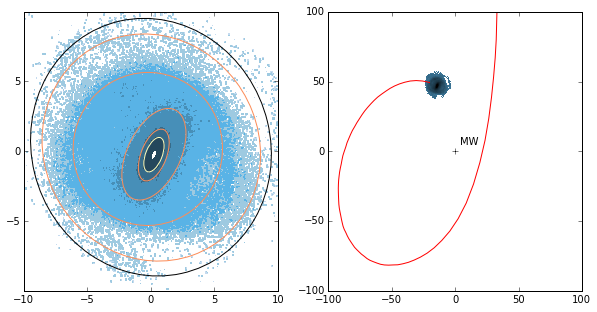

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

axis = axes[0]

custom_plot(snap, axis, settings, plot_contours=True)

axis.set_xlabel('X [kpc]', fontsize=15)
axis.set_ylabel('Y [kpc]', fontsize=15)

centerx = (bin_dict['Z2x'][:-1] + bin_dict['Z2x'][1:])/2.
centery = (bin_dict['Z2y'][:-1] + bin_dict['Z2y'][1:])/2.

centerX, centerY = np.meshgrid(centerx, centery, indexing='ij')  # ij indexing to match with hist2d

img = bin_dict['Z2']
img[img != img] = -10

axis = axes[1]

axis.pcolormesh(centerX, centerY, img, vmin=-1, vmax=2, cmap=settings['colormap'])
axis.plot(0, 0, 'k+')
axis.text(5, 5, 'MW', fontsize=10)
axis.plot((lmc_pos - mw_pos)[:95, 0], (lmc_pos - mw_pos)[:95, 1], 'r')

axis.set_xlim([-100, 100])
axis.set_ylim([-100, 100])

axis.set_xlabel('X [kpc]', fontsize=15)
axis.set_ylabel('Y [kpc]', fontsize=15)



In [95]:
def custom_plot(snap, axis, settings, plot_contours=True):
    bin_dict = snap.bin_snap(settings)
    Z2 = bin_dict['Z2']
    centerx = (bin_dict['Z2x'][:-1] + bin_dict['Z2x'][1:]) / 2
    centery = (bin_dict['Z2y'][:-1] + bin_dict['Z2y'][1:]) / 2
    centerX, centerY = np.meshgrid(centerx, centery, indexing='ij')
    xmax = 8
    ymax = 8
    levels = np.linspace(settings['in_min'], settings['in_max'], 20)
    levels = np.append(levels, 2.8)

    im = axis.contourf(centerX, centerY, Z2,
                       colors = [(198/255.,219/255.,239/255., 1),
                                 (158/255.,202/255.,225/255., 1),
                                 cmap(0), cmap(0.2), cmap(0.4), cmap(0.6), cmap(0.8), cmap(1)],
                       vmin=settings['in_min'],
                      levels=levels[[0, 4, 8, 12, 16, -2, -1]])
    if settings['plotCompanionCOM']:
        companionCOM = bin_dict['companionCOM']
        if (np.abs(companionCOM[0]) < xmax
                and np.abs(companionCOM[1]) < ymax):
            axis.plot(companionCOM[0], companionCOM[1], marker='o', ms=10)
            com1, com2, gal1id, gal2id = snap.center_of_mass('stars')

            vx = snap.vel['stars'][gal2id, 0].mean()/np.sqrt(np.sum(snap.vel['stars'][gal2id, :].mean(axis=0)**2))
            vy = snap.vel['stars'][gal1id, 1].mean()/np.sqrt(np.sum(snap.vel['stars'][gal2id, :].mean(axis=0)**2))

            axis.arrow(companionCOM[0], companionCOM[1],
                       vx, vy,
                       head_width=0.25, head_length=0.5, fc='k', ec='k')

    if plot_contours:
        measurements = manipulate.fit_contours(Z2, settings, plot=True)
        eccs = measurements['eccs']
        majors = measurements['majors']
        minors = measurements['minors']
        axes_ratios = measurements['axes_ratios']
        xCenters = measurements['xCenters']
        yCenters = measurements['yCenters']
        ellipses = measurements['ellipses']
        angles = measurements['angles']

        bar_ind = np.max(np.where(eccs > 0.5)[0])
        for i, (e,
                major,
                minor,
                ecc,
                axis_ratio,
                xCenter,
                yCenter,
                angle) in enumerate(zip(ellipses,
                                        majors,
                                        minors,
                                        eccs,
                                        axes_ratios,
                                        xCenters,
                                        yCenters,
                                        angles)):
            e = Ellipse([xCenter, yCenter],
                         major,
                         minor,
                         angle=-angle,
                         fill=False)
            if i == bar_ind:
                e.set_color('#ffffbf')
                #axis.plot(yCenter, xCenter, 'b.', ms=5)
                axis.add_artist(e)
            elif i == 0:
                e.set_color('black')
                #axis.plot(yCenter, xCenter, 'r+', ms=5, zorder=10)
                axis.add_artist(e)

            elif i in [4, 8, 12, 16, 20]:
                e.set_color('#fc8d59')
                axis.add_artist(e)
            #if (i==0) or ((major != majors[i-1]) and (minor != minors[i-1])):
            #    ell_art = axis.add_artist(e)

    if plot_contours:
        return im, measurements
    else:
        return im